In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = dataset.iloc[:, 1:-1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y = dataset.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
# reshaping y
# y = y.reshape(-1,1)

In [6]:
# y

In [7]:
# another way to reshape
y = y.reshape(len(y),1)

In [8]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

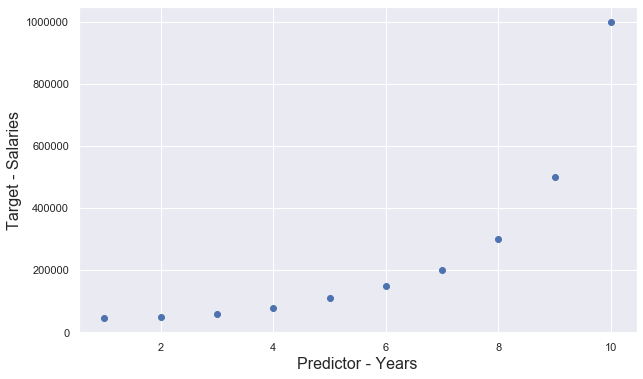

In [9]:
# visualizing the x and y
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.xlabel('Predictor - Years', fontsize=16)
plt.ylabel('Target - Salaries', fontsize=16)
plt.show()

# Applying Linear Regression

In [10]:
# importing Linear Regression
from sklearn.linear_model import LinearRegression

In [11]:
# Training the model
lm = LinearRegression()
lm.fit(x.reshape(-1,1), y.reshape(-1,1,))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# appling prediction to entire x datapoints, will used these for comparision later
y_pred = lm.predict(x.reshape(-1,1))

In [13]:
# predicting the new value using Linear Regression
y_hat_lm= lm.predict([[6.5]])

In [14]:
print("Predicted Salary for 6.5 years using Linear Model is => ", y_hat_lm)

Predicted Salary for 6.5 years using Linear Model is =>  [[330378.78787879]]


# Visualising the Linear Regression results

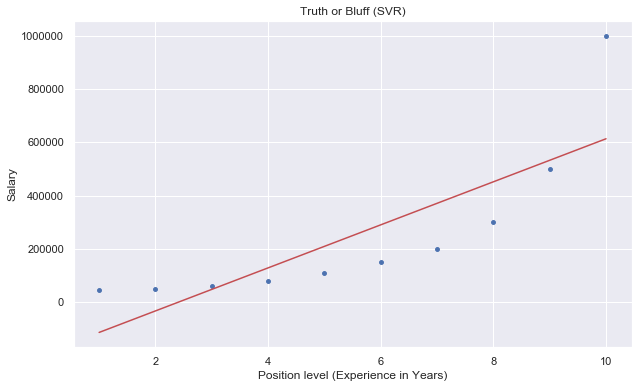

In [15]:
# Plotting the predicted value with the actual value
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=15)
plt.plot(x, y_pred, color='r')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level (Experience in Years)')
plt.ylabel('Salary')
plt.show()

# Applying Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
# applying polynomial degree of 4
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
lm_2 = LinearRegression()
lm_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# predicting the new value using Polynomial Linear Regression
y_ht_poly = lm_2.predict(poly_reg.fit_transform([[6.5]]))
print("Predicted Salary for 6.5 years using Poly Linear Model is => ",y_ht_poly)

Predicted Salary for 6.5 years using Poly Linear Model is =>  [[158862.45265153]]


In [19]:
# appling prediction to entire x datapoints, will used these for comparision later
y_poly_pred = lm_2.predict(poly_reg.fit_transform(x.reshape(-1,1)))
y_poly_pred

array([[ 53356.64335681],
       [ 31759.90675996],
       [ 58642.19114221],
       [ 94632.86713289],
       [121724.94172498],
       [143275.05827508],
       [184003.49650349],
       [289994.17249411],
       [528694.63869452],
       [988916.08391594]])

# Visualising the Polynomial Regression results

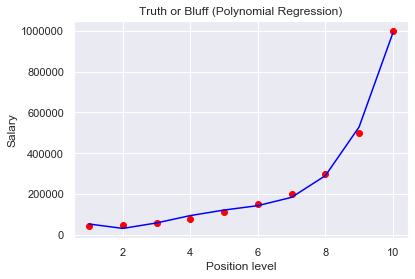

In [20]:
plt.scatter(x, y, color = 'red')
plt.plot(x, y_poly_pred, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Support Vector Regression (SVR)

<b>SVR required to have all the  datapoints in same scale. </b>

<b> So, we have to apply Feature Scaling</b>

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [22]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [23]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


<b> Training the SVR model on the whole dataset </b>

In [24]:
from sklearn.svm import SVR

In [25]:
lm_svr = SVR(kernel='rbf')
lm_svr.fit(x,y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
# predicting the new value using SVR Linear Regression
# we need to apply the inverse transform to get the out put into real form
y_ht_svr = sc_y.inverse_transform(lm_svr.predict(sc_x.transform([[6.5]])))
print("Predicted Salary for 6.5 years using SVR Linear Model is => ",y_ht_svr)

Predicted Salary for 6.5 years using SVR Linear Model is =>  [170370.0204065]


In [27]:
# Let see how the SVR regression performed on the non-linear data
# we will use this predicted value for creating the graph for comparison.
y_svr_pred = lm_svr.predict(sc_x.transform(x.reshape(-1,1)))
y_svr_pred

array([-0.2421045 , -0.30078456, -0.3625491 , -0.42451604, -0.48342382,
       -0.53598455, -0.579279  , -0.61112552, -0.63035603, -0.63694919])

# SVR Graph

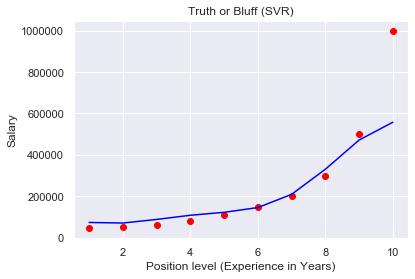

In [28]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(lm_svr.predict(x)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level (Experience in Years)')
plt.ylabel('Salary')
plt.show()

# comparing unseen data using three models

In [29]:
print("Predicted Salary for 6.5 years using Linear Model is => ", y_hat_lm)
print("Predicted Salary for 6.5 years using Poly Linear Model is => ",y_ht_poly)
print("Predicted Salary for 6.5 years using SVR Linear Model is => ",y_ht_svr)

Predicted Salary for 6.5 years using Linear Model is =>  [[330378.78787879]]
Predicted Salary for 6.5 years using Poly Linear Model is =>  [[158862.45265153]]
Predicted Salary for 6.5 years using SVR Linear Model is =>  [170370.0204065]


In [30]:
y_hat_lm= lm.predict([[7]])
print("Predicted Salary for 7 years using Linear Model is => ", y_hat_lm)

y_ht_poly = lm_2.predict(poly_reg.fit_transform([[7]]))
print("Predicted Salary for 7 years using Poly Linear Model is => ",y_ht_poly)

y_ht_svr = sc_y.inverse_transform(lm_svr.predict(sc_x.transform([[7]])))
print("Predicted Salary for 7 years using SVR Linear Model is => ",y_ht_svr)

Predicted Salary for 7 years using Linear Model is =>  [[370818.18181818]]
Predicted Salary for 7 years using Poly Linear Model is =>  [[184003.49650349]]
Predicted Salary for 7 years using SVR Linear Model is =>  [209410.23132923]


## As we can see SVR give better result compared to Linear and Poly Linear regressor